How does the virus grow by state?  Is there a process that represents this?

In [238]:
import pandas as pd
df = pd.read_csv('../data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
#df = df[df['Country/Region'] == 'US']
df.shape


(482, 64)

In [239]:
Wa = df[df['Province/State'] == 'Washington'].T
Wa

,98
Province/State,Washington
Country/Region,US
Lat,47.4009
Long,-121.49
1/22/20,0
...,...
3/17/20,1076
3/18/20,1014
3/19/20,1376
3/20/20,1524


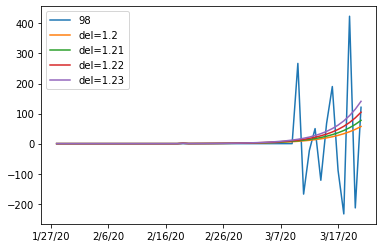

In [240]:
Wa2.plot(legend=True) 

In [241]:
Wa2 = Wa.iloc[4:].diff(axis = 0)
Wa2.shape

(60, 1)

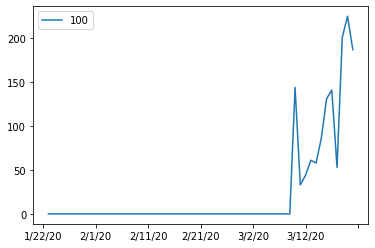

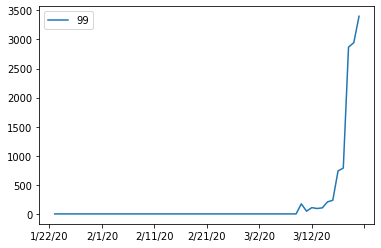

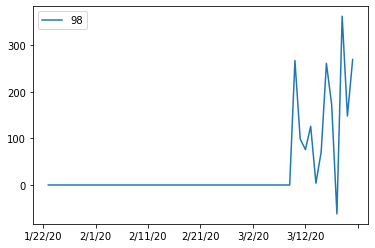

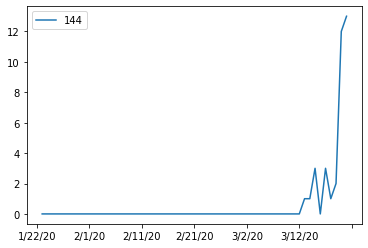

In [242]:
# These functions get daily new cases
def get_state(dataframe, statename):
    statedf = dataframe[dataframe['Province/State'] == statename]
    return statedf.T.iloc[4:].diff(axis = 0)

def get_nation(dataframe, nation):
    statedf = dataframe[dataframe['Country/Region'] == nation]
    return statedf.T.iloc[4:].diff(axis = 0)

def plot_nation(dataframe, nation):
    get_nation(dataframe, nation).plot(legend = True)

def plot_state(dataframe, statename):
    get_state(dataframe, statename).plot(legend=True)
    
plot_state(df, 'California')
plot_state(df, 'New York')
plot_state(df, 'Washington')
plot_state(df, 'Idaho')


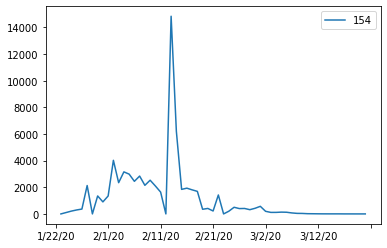

In [243]:
plot_state(df,'Hubei')

In [244]:
def zero_gen(n):
    for i in range(n):
        yield 0

def zeros(n):
    return list(zero_gen(n))
    
# assume a growth rate of 1.2.  plot 20 days from a single infection
def next_day(ndays, rate):
    x = 1
    for d in range(ndays):
        x = x*rate
        yield x

def exp_days(ndays, rate):
    return [*list(zeros(Wa.shape[0] - ndays)), *list(next_day(ndays, rate))]

ndays = 32
Wa = get_state(df, 'Washington')

days = exp_days(ndays, 1.2)
print(len(days))

print(Wa.shape)
Wa['del=1.2'] = exp_days(ndays, 1.2)
Wa['del=1.21'] = exp_days(ndays, 1.21)
Wa['del=1.22'] = exp_days(ndays, 1.22)
Wa['del=1.23'] = exp_days(ndays, 1.23)


60
(60, 1)


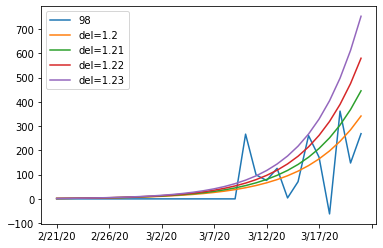

In [245]:
import matplotlib.pyplot as plt

Wa.iloc[30:].plot()

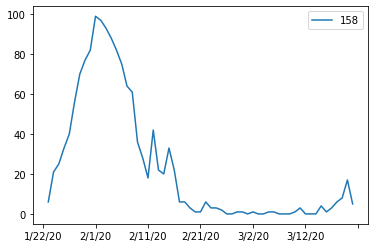

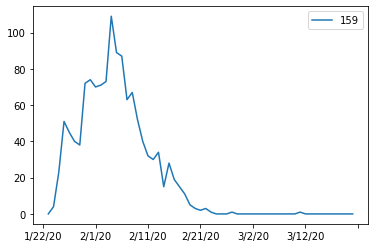

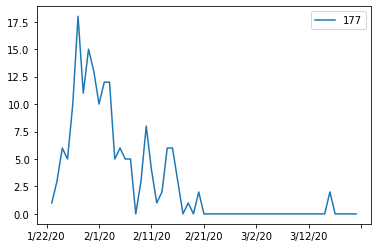

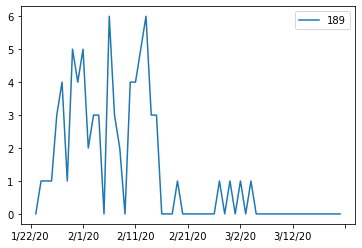

In [246]:
plot_state(df, 'Guangdong')
plot_state(df, 'Henan')
plot_state(df, 'Yunnan')
plot_state(df, 'Ningxia')

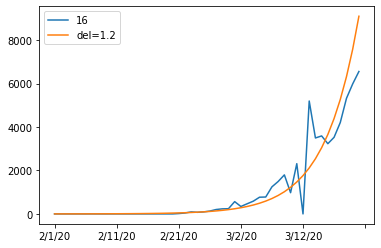

In [247]:
ndays = 50
it = get_nation(df, 'Italy')
it['del=1.2'] = exp_days(ndays, 1.2)
it.iloc[-ndays:].plot()

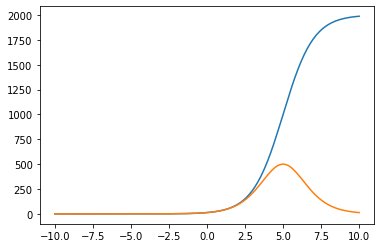

In [248]:
import numpy as np
# Lets plot the sigmiod this way.
def sigmoid(x, b=1.0, scale=1.0, offset = 0):
    return scale * 1.0/(1.0 + np.exp(-(x-offset)*b))

# sigmoid derivative
def dsigmoid(x, b=1.0, scale=1.0, offset = 0):
    return scale*b*sigmoid(x, b, scale=1.0, offset=offset)*(1-sigmoid(x, b, scale=1.0, offset=offset))

r = 10.0
s = 200
xs = np.linspace(-r,r, s)
plt.plot(xs, [sigmoid(x, scale=2000.0, offset=5) for x in xs])
plt.plot(xs, [dsigmoid(x, scale=2000.0, offset=5) for x in xs])

(60, 2)


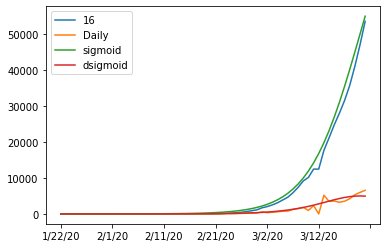

In [257]:
italy = df[df['Country/Region'] == 'Italy'].T.iloc[4:]
italy['Daily'] = get_nation(df, "Italy")
print(italy.shape)
italy['sigmoid'] = [sigmoid(x, b=0.2, scale=100000, offset=58) for x in range(200)][:60]
italy['dsigmoid'] = [dsigmoid(x, b=0.2, scale=100000, offset=58) for x in range(200)][:60]
italy.plot()

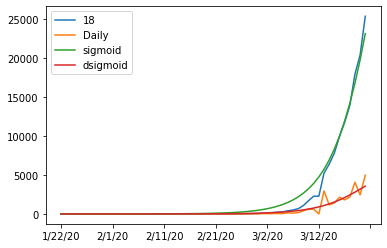

In [264]:
spain =  df[df['Country/Region'] == 'Spain'].T.iloc[4:]
spain['Daily'] = get_nation(df, "Spain")
spain['sigmoid'] = [sigmoid(x, b=0.2, scale=100000, offset=65) for x in range(200)][:60]
spain['dsigmoid'] = [dsigmoid(x, b=0.2, scale=100000, offset=65) for x in range(200)][:60]
spain.plot()